In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 세계 행복지수 데이터 로드
df_2015=pd.read_csv(r'C:\Users\bluecom015\Desktop\SeSAC\Personal\raw data\world happiness\2015.csv')
df_2015

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\bluecom015\\Desktop\\SeSAC\\Personal\\raw data\\world happiness\\2015.csv'

In [ ]:
# 지역별로 데이터 정리하고, 동아시아 지역 데이터 확인
groups = df_2015.groupby('Region')
result = dict(list(groups))
result['Eastern Asia']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
37,Taiwan,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
83,China,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040
99,Mongolia,Eastern Asia,100,4.874,0.03313,0.82819,1.30060,0.60268,0.43626,0.02666,0.33230,1.34759


In [3]:
df_2015.columns # 컬럼명 확인
df_2015['Region'].unique()  # 지역명 확인

NameError: name 'df_2015' is not defined

In [ ]:
# 서유럽과 북미의 행복점수를 t검정
WestEur = df_2015.loc[df_2015['Region']=='Western Europe']
NorAm = df_2015.loc[df_2015['Region']=='North America']

t_stats, p_value = stats.ttest_ind(WestEur['Happiness Score'], NorAm['Happiness Score'])
print(t_stats, p_value)

-0.9779525619333025 0.3392302243783656


두 지역의 행복점수는 통계적으로 유의미하게 다르다는 것을 확인할 수 있음

In [ ]:
# 동아시아와 북미의 행복점수를 t검정
EastAsia = df_2015.loc[df_2015['Region']=='East Asia']
NorAm = df_2015.loc[df_2015['Region']=='North America']

t_stats, p_value = stats.ttest_ind(WestEur['Happiness Score'], NorAm['Happiness Score'])
print(t_stats, p_value)

In [ ]:
# 피어슨 상관계수를 이용하여 서로 관련있을 것으로 생각되는 행복 점수, 1인당 GDP, 기대수명, 정부 부패도, 자유도에 대한 상관계수 분석을 진행
cols = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Freedom']
corr = df_2015[cols].corr(method = 'pearson')
corr

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Trust (Government Corruption),Freedom
Happiness Score,1.000000,0.780966,0.724200,0.395199,0.568211
Economy (GDP per Capita),0.780966,1.000000,0.816478,0.307885,0.370300
Health (Life Expectancy),0.724200,0.816478,1.000000,0.248335,0.360477
Trust (Government Corruption),0.395199,0.307885,0.248335,1.000000,0.493524
Freedom,0.568211,0.370300,0.360477,0.493524,1.000000


행복 점수에 대해 1인당 GDP와 기대 수명은 0.7 이상의 강한 상관관계가 있는 것으로 확인되며, 자유도와는 약한 상관관계를 가지는 것으로 보이고, 정부 부패도와는 거의 관련이 없다는 것을 확인할 수 있다.  
개인적으로는 자유도와 1인당 GDP나 기대수명 간의 상관관계가 예상보다 상당히 낮은 것이 의외의 사실이었다.

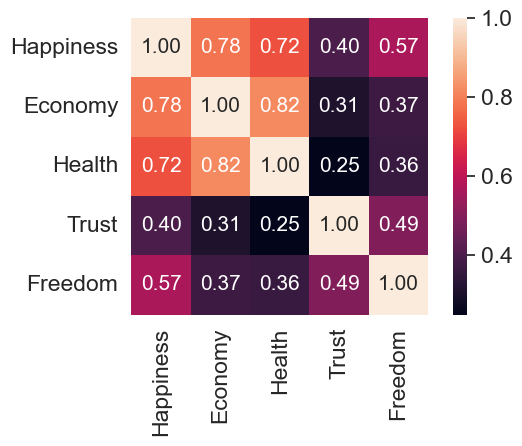

In [ ]:
cols_view = ['Happiness', 'Economy', 'Health', 'Trust', 'Freedom'] # 그래프 출력을 위해 컬럼명을 축약
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

위의 내용을 seaborn의 히트맵을 통해 시각화하여 확인할 수 있었다.